# 二、项目的历史轨迹分析

In [1]:
// 初始化全局参数
var openDigger = require('../src/open_digger');
var repo_id=22442668;var repo_name='openshift/origin'
var query = openDigger.driver.clickhouse.query;
// query(`SHOW DATABASES`).then(res=>{console.log(res);})
query(`SHOW TABLES from github_log`).then(res=>{ console.log(res);})

[ { name: 'events' } ]


In [150]:
// var q = `SELECT *
//     From github_log.events
//     where repo_id =${repo_id}
//     limit (1)`;
// openDigger.driver.clickhouse.query(q);

## 1. 每月新增 Star 和 Frok 的个数

#### (1)每月新增Star数

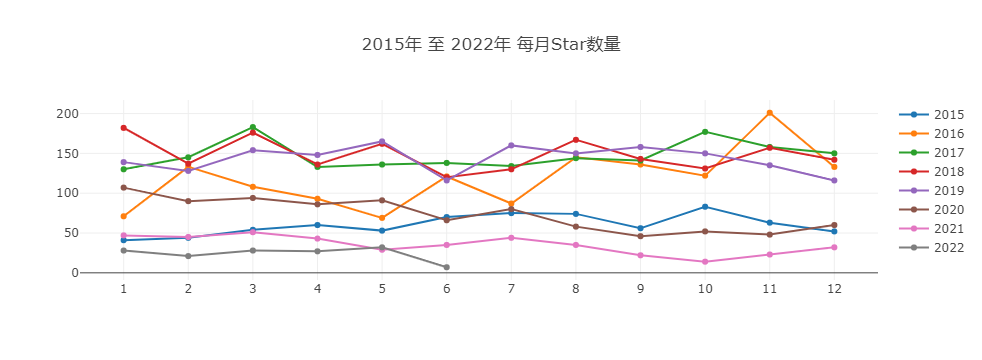

┌─────────┬──────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬──────┬──────┬──────┐
│ (index) │ 年份 │ 1月 │ 2月 │ 3月 │ 4月 │ 5月 │ 6月 │ 7月 │ 8月 │ 9月 │ 10月 │ 11月 │ 12月 │
├─────────┼──────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┤
│    0    │ 2015 │ 41  │ 44  │ 54  │ 60  │ 53  │ 70  │ 75  │ 74  │ 56  │  83  │  63  │  52  │
│    1    │ 2016 │ 71  │ 133 │ 108 │ 93  │ 69  │ 121 │ 87  │ 145 │ 136 │ 122  │ 201  │ 133  │
│    2    │ 2017 │ 130 │ 145 │ 183 │ 133 │ 136 │ 138 │ 134 │ 144 │ 141 │ 177  │ 158  │ 150  │
│    3    │ 2018 │ 182 │ 137 │ 176 │ 136 │ 162 │ 120 │ 130 │ 167 │ 143 │ 131  │ 157  │ 142  │
│    4    │ 2019 │ 139 │ 128 │ 154 │ 148 │ 165 │ 116 │ 160 │ 150 │ 158 │ 150  │ 135  │ 116  │
│    5    │ 2020 │ 107 │ 90  │ 94  │ 86  │ 91  │ 66  │ 80  │ 58  │ 46  │  52  │  48  │  60  │
│    6    │ 2021 │ 47  │ 45  │ 51  │ 43  │ 29  │ 35  │ 44  │ 35  │ 22  │  14  │  23  │  32  │
│    7    │ 2022 │ 28  │ 21  │ 28  │ 27  │ 32  │  7  │     │     │     │  

In [ ]:
var q = `SELECT  toYear(created_at) as Year, toMonth(created_at) as Month, Count(*) as fork_num
    From github_log.events
    where repo_id =${repo_id} and type='WatchEvent'
    Group by toYear(created_at),toMonth(created_at)`;
(openDigger.driver.clickhouse.query(q)).then(data=>{
    //排序
    data.sort(function(a,b){
    return a['Month']-b['Month'];
    })

    Alldata=[]
    Year=[2015,2016,2017,2018,2019,2020,2021,2022]
    for(var i=0;i<Year.length;i++){
        var y=[]
        var x=[]
        data.forEach((d,index)=>{
            if(d['Year']==Year[i]){
                var x_index=x.indexOf(d['Month'])
                if(x_index===-1){
                    y.push(parseInt(d['fork_num']))
                    x.push(d['Month'])
                }
                else {
                    y[x_index]+=parseInt(d['fork_num'])
                }}
})
    Alldata.push({y: y,x:x,name:Year[i]})
    }
   openDigger.render.plotly(Alldata, {
        title:  `${startYear}年 至 ${year}年 每月Star数量`,
        xaxis: {type: 'category'}
    });
    var tableData=[]
    Alldata.forEach((d,index)=>{
    //console.log(d)
    var table={}
    table['年份']=d['name']
    for(var i = 0;i<d['y'].length;i++){
       table[(d['x'][i])+'月']=d['y'][i]
        }
    tableData.push(table)
});
    console.table(tableData)
})

#### （2）每月新增fork数

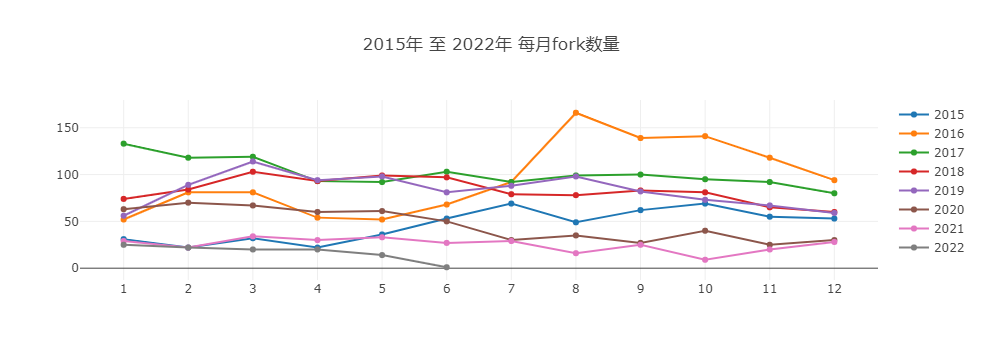

┌─────────┬──────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬──────┬──────┬──────┐
│ (index) │ 年份 │ 1月 │ 2月 │ 3月 │ 4月 │ 5月 │ 6月 │ 7月 │ 8月 │ 9月 │ 10月 │ 11月 │ 12月 │
├─────────┼──────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┤
│    0    │ 2015 │ 31  │ 22  │ 32  │ 22  │ 36  │ 53  │ 69  │ 49  │ 62  │  69  │  55  │  53  │
│    1    │ 2016 │ 52  │ 81  │ 81  │ 54  │ 52  │ 68  │ 92  │ 166 │ 139 │ 141  │ 118  │  94  │
│    2    │ 2017 │ 133 │ 118 │ 119 │ 93  │ 92  │ 103 │ 92  │ 99  │ 100 │  95  │  92  │  80  │
│    3    │ 2018 │ 74  │ 84  │ 103 │ 93  │ 99  │ 97  │ 79  │ 78  │ 83  │  81  │  65  │  60  │
│    4    │ 2019 │ 56  │ 89  │ 114 │ 94  │ 98  │ 81  │ 88  │ 98  │ 82  │  73  │  67  │  59  │
│    5    │ 2020 │ 63  │ 70  │ 67  │ 60  │ 61  │ 50  │ 30  │ 35  │ 27  │  40  │  25  │  30  │
│    6    │ 2021 │ 29  │ 22  │ 34  │ 30  │ 33  │ 27  │ 29  │ 16  │ 25  │  9   │  20  │  28  │
│    7    │ 2022 │ 25  │ 22  │ 20  │ 20  │ 14  │  1  │     │     │     │  

In [153]:
var q = `SELECT  toYear(created_at) as Year, toMonth(created_at) as Month, Count(*) as fork_num
    From github_log.events
    where repo_id =${repo_id} and type='ForkEvent'
    Group by toYear(created_at),toMonth(created_at)`;
(openDigger.driver.clickhouse.query(q)).then(data=>{
    //排序
    data.sort(function(a,b){
    return a['Month']-b['Month'];
    })

    Alldata=[]
    Year=[2015,2016,2017,2018,2019,2020,2021,2022]
    for(var i=0;i<Year.length;i++){
        var y=[]
        var x=[]
        data.forEach((d,index)=>{
            if(d['Year']==Year[i]){
                var x_index=x.indexOf(d['Month'])
                if(x_index===-1){
                    y.push(parseInt(d['fork_num']))
                    x.push(d['Month'])
                }
                else {
                    y[x_index]+=parseInt(d['fork_num'])
                }}
})
    Alldata.push({y: y,x:x,name:Year[i]})
    }
   openDigger.render.plotly(Alldata, {
        title:  `${startYear}年 至 ${year}年 每月fork数量`,
        xaxis: {type: 'category'}
    });
    var tableData=[]
    Alldata.forEach((d,index)=>{
    //console.log(d)
    var table={}
    table['年份']=d['name']
    for(var i = 0;i<d['y'].length;i++){
       table[(d['x'][i])+'月']=d['y'][i]
        }
    tableData.push(table)
});
    console.table(tableData)
})

### 2. 每月打开 Issue 和 关闭 Issue 的个数

#### （1）每月打开 Issue个数

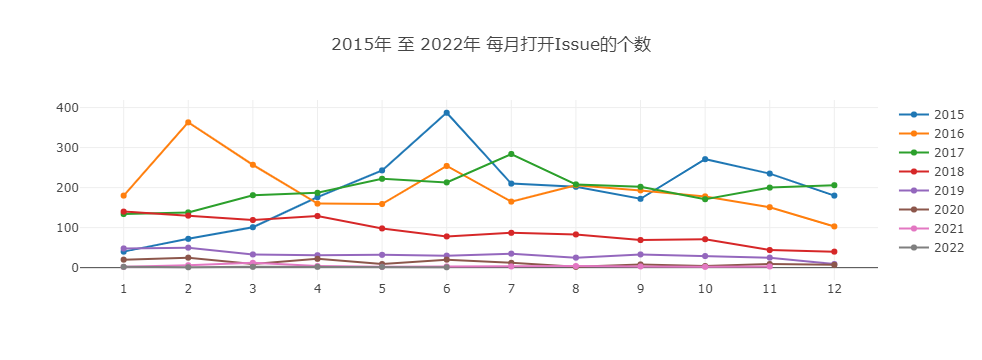

┌─────────┬──────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬──────┬──────┬──────┐
│ (index) │ 年份 │ 1月 │ 2月 │ 3月 │ 4月 │ 5月 │ 6月 │ 7月 │ 8月 │ 9月 │ 10月 │ 11月 │ 12月 │
├─────────┼──────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┤
│    0    │ 2015 │ 40  │ 72  │ 101 │ 176 │ 243 │ 387 │ 210 │ 202 │ 172 │ 271  │ 235  │ 180  │
│    1    │ 2016 │ 180 │ 363 │ 257 │ 160 │ 159 │ 254 │ 165 │ 206 │ 193 │ 178  │ 151  │ 103  │
│    2    │ 2017 │ 134 │ 138 │ 181 │ 187 │ 222 │ 213 │ 284 │ 208 │ 202 │ 171  │ 200  │ 206  │
│    3    │ 2018 │ 140 │ 130 │ 119 │ 129 │ 98  │ 78  │ 87  │ 83  │ 69  │  71  │  44  │  40  │
│    4    │ 2019 │ 48  │ 50  │ 33  │ 31  │ 32  │ 30  │ 35  │ 25  │ 33  │  29  │  25  │  9   │
│    5    │ 2020 │ 20  │ 25  │  9  │ 22  │  9  │ 20  │ 12  │  2  │  8  │  4   │  9   │  7   │
│    6    │ 2021 │  2  │  6  │ 12  │  4  │  2  │  3  │  3  │  4  │  3  │  2   │  3   │      │
│    7    │ 2022 │  2  │  1  │  2  │  2  │  2  │  1  │     │     │     │  

In [154]:
var q = `SELECT  toYear(created_at) as Year, toMonth(created_at) as Month, Count(*) as issue_created_cnt
    From github_log.events
    where repo_id =${repo_id} and type='IssuesEvent' and action='opened'
    Group by toYear(created_at),toMonth(created_at)`;
(openDigger.driver.clickhouse.query(q)).then(data=>{
    //排序
    data.sort(function(a,b){
    return a['Month']-b['Month'];
    })

    Alldata=[]
    Year=[2015,2016,2017,2018,2019,2020,2021,2022]
    for(var i=0;i<Year.length;i++){
        var y=[]
        var x=[]
        data.forEach((d,index)=>{
            if(d['Year']==Year[i]){
                var x_index=x.indexOf(d['Month'])
                if(x_index===-1){
                    y.push(parseInt(d['issue_created_cnt']))
                    x.push(d['Month'])
                }
                else {
                    y[x_index]+=parseInt(d['issue_created_cnt'])
                }}
})
    Alldata.push({y: y,x:x,name:Year[i]})
    }
   openDigger.render.plotly(Alldata, {
        title:  `${startYear}年 至 ${year}年 每月打开Issue的个数`,
        xaxis: {type: 'category'}
    });
    var tableData=[]
    Alldata.forEach((d,index)=>{
    //console.log(d)
    var table={}
    table['年份']=d['name']
    for(var i = 0;i<d['y'].length;i++){
       table[(d['x'][i])+'月']=d['y'][i]
        }
    tableData.push(table)
});
    console.table(tableData)
})

#### （2）每月关闭issue个数

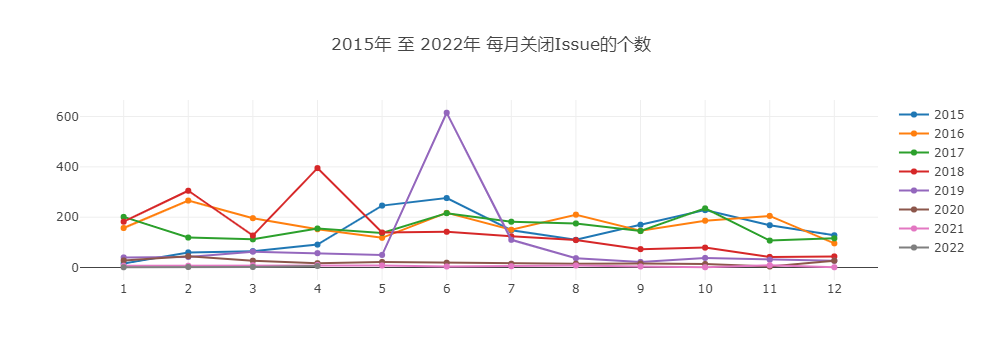

┌─────────┬──────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬──────┬──────┬──────┐
│ (index) │ 年份 │ 1月 │ 2月 │ 3月 │ 4月 │ 5月 │ 6月 │ 7月 │ 8月 │ 9月 │ 10月 │ 11月 │ 12月 │
├─────────┼──────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┤
│    0    │ 2015 │ 16  │ 60  │ 65  │ 91  │ 246 │ 276 │ 148 │ 110 │ 170 │ 228  │ 168  │ 128  │
│    1    │ 2016 │ 157 │ 266 │ 196 │ 152 │ 118 │ 217 │ 150 │ 210 │ 146 │ 186  │ 205  │  96  │
│    2    │ 2017 │ 201 │ 119 │ 112 │ 155 │ 137 │ 216 │ 182 │ 175 │ 145 │ 235  │ 107  │ 116  │
│    3    │ 2018 │ 182 │ 305 │ 127 │ 395 │ 139 │ 142 │ 124 │ 109 │ 73  │  79  │  42  │  44  │
│    4    │ 2019 │ 40  │ 42  │ 63  │ 57  │ 50  │ 615 │ 110 │ 37  │ 22  │  38  │  31  │  27  │
│    5    │ 2020 │ 28  │ 45  │ 27  │ 17  │ 22  │ 19  │ 15  │ 15  │ 16  │  14  │  4   │  27  │
│    6    │ 2021 │  7  │  7  │  9  │ 10  │  8  │  4  │  5  │  8  │  4  │  1   │  9   │  1   │
│    7    │ 2022 │  1  │  2  │  2  │  6  │     │     │     │     │     │  

In [155]:
var q = `SELECT  toYear(created_at) as Year, toMonth(created_at) as Month, Count(*) as issue_closed_cnt
    From github_log.events
    where repo_id =${repo_id} and type='IssuesEvent' and action='closed'
    Group by toYear(created_at),toMonth(created_at)`;
(openDigger.driver.clickhouse.query(q)).then(data=>{
    //排序
    data.sort(function(a,b){
    return a['Month']-b['Month'];
    })

    Alldata=[]
    Year=[2015,2016,2017,2018,2019,2020,2021,2022]
    for(var i=0;i<Year.length;i++){
        var y=[]
        var x=[]
        data.forEach((d,index)=>{
            if(d['Year']==Year[i]){
                var x_index=x.indexOf(d['Month'])
                if(x_index===-1){
                    y.push(parseInt(d['issue_closed_cnt']))
                    x.push(d['Month'])
                }
                else {
                    y[x_index]+=parseInt(d['issue_closed_cnt'])
                }}
})
    Alldata.push({y: y,x:x,name:Year[i]})
    }
   openDigger.render.plotly(Alldata, {
        title:  `${startYear}年 至 ${year}年 每月关闭Issue的个数`,
        xaxis: {type: 'category'}
    });
    var tableData=[]
    Alldata.forEach((d,index)=>{
    //console.log(d)
    var table={}
    table['年份']=d['name']
    for(var i = 0;i<d['y'].length;i++){
       table[(d['x'][i])+'月']=d['y'][i]
        }
    tableData.push(table)
});
    console.table(tableData)
})

### 3. 每月打开 PR 和合入 PR 的个数（注意，关闭 PR 不等于合入）

#### （1）每月打开 PR 个数

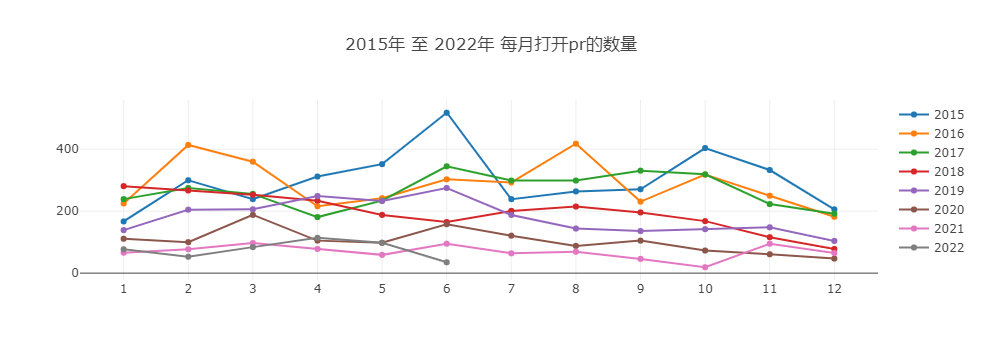

┌─────────┬──────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬──────┬──────┬──────┐
│ (index) │ 年份 │ 1月 │ 2月 │ 3月 │ 4月 │ 5月 │ 6月 │ 7月 │ 8月 │ 9月 │ 10月 │ 11月 │ 12月 │
├─────────┼──────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┤
│    0    │ 2015 │ 167 │ 300 │ 239 │ 312 │ 352 │ 518 │ 239 │ 264 │ 271 │ 404  │ 333  │ 206  │
│    1    │ 2016 │ 225 │ 414 │ 360 │ 216 │ 242 │ 303 │ 293 │ 418 │ 231 │ 318  │ 250  │ 182  │
│    2    │ 2017 │ 239 │ 275 │ 256 │ 181 │ 234 │ 345 │ 299 │ 299 │ 331 │ 319  │ 223  │ 192  │
│    3    │ 2018 │ 281 │ 267 │ 253 │ 234 │ 188 │ 165 │ 201 │ 215 │ 196 │ 168  │ 116  │  78  │
│    4    │ 2019 │ 139 │ 205 │ 206 │ 249 │ 233 │ 275 │ 188 │ 144 │ 136 │ 142  │ 148  │ 104  │
│    5    │ 2020 │ 111 │ 100 │ 188 │ 105 │ 98  │ 158 │ 121 │ 88  │ 105 │  73  │  61  │  47  │
│    6    │ 2021 │ 66  │ 77  │ 97  │ 78  │ 59  │ 95  │ 64  │ 69  │ 46  │  19  │  95  │  65  │
│    7    │ 2022 │ 77  │ 53  │ 84  │ 114 │ 98  │ 35  │     │     │     │  

In [157]:
var q = `SELECT  toYear(created_at) as Year, toMonth(created_at) as Month, Count(*) as open
    From github_log.events
    where repo_id =${repo_id} and type='PullRequestEvent' and action='opened'
    Group by toYear(created_at),toMonth(created_at)`;
(openDigger.driver.clickhouse.query(q)).then(data=>{
    //排序
    data.sort(function(a,b){
    return a['Month']-b['Month'];
    })

    Alldata=[]
    Year=[2015,2016,2017,2018,2019,2020,2021,2022]
    for(var i=0;i<Year.length;i++){
        var y=[]
        var x=[]
        data.forEach((d,index)=>{
            if(d['Year']==Year[i]){
                var x_index=x.indexOf(d['Month'])
                if(x_index===-1){
                    y.push(parseInt(d['open']))
                    x.push(d['Month'])
                }
                else {
                    y[x_index]+=parseInt(d['open'])
                }}
})
    Alldata.push({y: y,x:x,name:Year[i]})
    }
   openDigger.render.plotly(Alldata, {
        title:  `${startYear}年 至 ${year}年 每月打开pr的数量`,
        xaxis: {type: 'category'}
    });
    var tableData=[]
    Alldata.forEach((d,index)=>{
    //console.log(d)
    var table={}
    table['年份']=d['name']
    for(var i = 0;i<d['y'].length;i++){
       table[(d['x'][i])+'月']=d['y'][i]
        }
    tableData.push(table)
});
    console.table(tableData)
})

#### （2）每月合入PR个数（注意，关闭 PR 不等于合入）

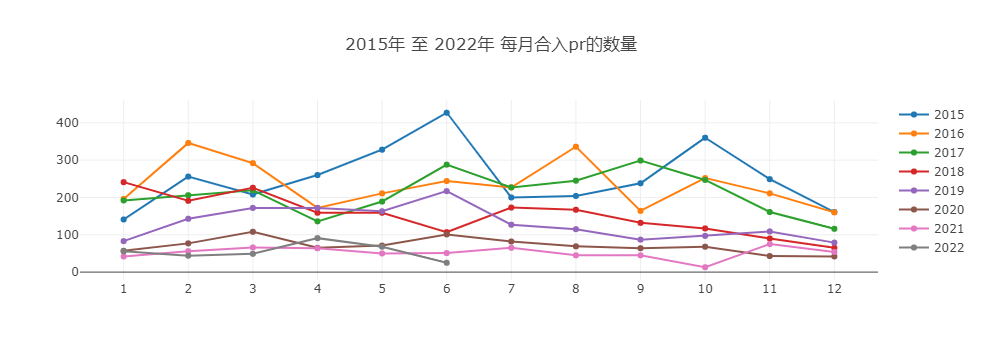

┌─────────┬──────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬──────┬──────┬──────┐
│ (index) │ 年份 │ 1月 │ 2月 │ 3月 │ 4月 │ 5月 │ 6月 │ 7月 │ 8月 │ 9月 │ 10月 │ 11月 │ 12月 │
├─────────┼──────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┤
│    0    │ 2015 │ 141 │ 256 │ 208 │ 260 │ 328 │ 427 │ 200 │ 204 │ 238 │ 360  │ 249  │ 161  │
│    1    │ 2016 │ 196 │ 346 │ 292 │ 172 │ 211 │ 244 │ 227 │ 336 │ 164 │ 252  │ 211  │ 160  │
│    2    │ 2017 │ 192 │ 206 │ 219 │ 136 │ 189 │ 288 │ 227 │ 245 │ 299 │ 247  │ 161  │ 116  │
│    3    │ 2018 │ 241 │ 191 │ 226 │ 159 │ 159 │ 107 │ 173 │ 167 │ 132 │ 117  │  90  │  65  │
│    4    │ 2019 │ 83  │ 143 │ 172 │ 172 │ 163 │ 217 │ 127 │ 115 │ 87  │  97  │ 109  │  79  │
│    5    │ 2020 │ 57  │ 77  │ 108 │ 65  │ 71  │ 101 │ 82  │ 69  │ 64  │  68  │  43  │  42  │
│    6    │ 2021 │ 42  │ 56  │ 66  │ 64  │ 50  │ 51  │ 65  │ 45  │ 45  │  13  │  75  │  54  │
│    7    │ 2022 │ 56  │ 44  │ 49  │ 91  │ 68  │ 25  │     │     │     │  

In [159]:
var q = `SELECT  toYear(created_at) as Year, toMonth(created_at) as Month, count(pull_merged) as num
    From github_log.events
    where repo_id =${repo_id} and type='PullRequestEvent' and pull_merged=1
    Group by toYear(created_at),toMonth(created_at)`;
(openDigger.driver.clickhouse.query(q)).then(data=>{
    //排序
    data.sort(function(a,b){
    return a['Month']-b['Month'];
    })

    Alldata=[]
    Year=[2015,2016,2017,2018,2019,2020,2021,2022]
    for(var i=0;i<Year.length;i++){
        var y=[]
        var x=[]
        data.forEach((d,index)=>{
            if(d['Year']==Year[i]){
                var x_index=x.indexOf(d['Month'])
                if(x_index===-1){
                    y.push(parseInt(d['num']))
                    x.push(d['Month'])
                }
                else {
                    y[x_index]+=parseInt(d['num'])
                }}
})
    Alldata.push({y: y,x:x,name:Year[i]})
    }
   openDigger.render.plotly(Alldata, {
        title:  `${startYear}年 至 ${year}年 每月合入pr的数量`,
        xaxis: {type: 'category'}
    });
    var tableData=[]
    Alldata.forEach((d,index)=>{
    //console.log(d)
    var table={}
    table['年份']=d['name']
    for(var i = 0;i<d['y'].length;i++){
       table[(d['x'][i])+'月']=d['y'][i]
        }
    tableData.push(table)
});
    console.table(tableData)
})

### 4. 每月在仓库中活跃（只要有日志产生就算）的不同开发者（也就是一个GitHub账号）总数

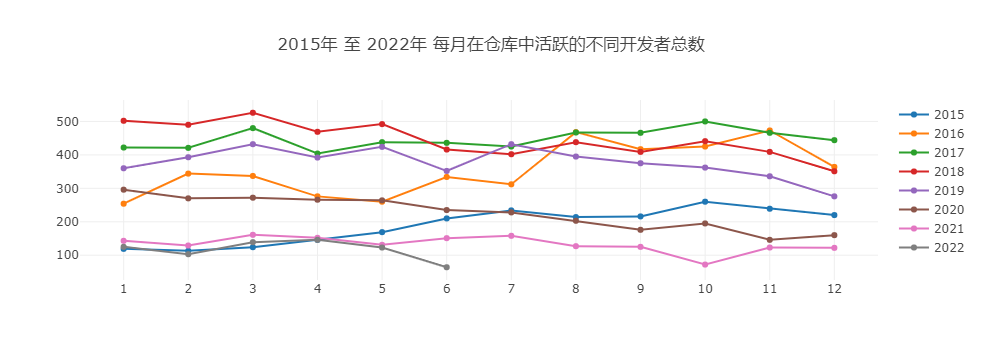

┌─────────┬──────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬──────┬──────┬──────┐
│ (index) │ 年份 │ 1月 │ 2月 │ 3月 │ 4月 │ 5月 │ 6月 │ 7月 │ 8月 │ 9月 │ 10月 │ 11月 │ 12月 │
├─────────┼──────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┤
│    0    │ 2015 │ 119 │ 113 │ 124 │ 146 │ 169 │ 210 │ 234 │ 214 │ 216 │ 260  │ 239  │ 220  │
│    1    │ 2016 │ 254 │ 344 │ 337 │ 276 │ 260 │ 334 │ 312 │ 468 │ 417 │ 425  │ 473  │ 364  │
│    2    │ 2017 │ 422 │ 421 │ 480 │ 404 │ 438 │ 436 │ 425 │ 467 │ 466 │ 500  │ 466  │ 444  │
│    3    │ 2018 │ 502 │ 490 │ 526 │ 469 │ 492 │ 416 │ 402 │ 438 │ 409 │ 441  │ 409  │ 351  │
│    4    │ 2019 │ 360 │ 393 │ 432 │ 392 │ 424 │ 352 │ 432 │ 395 │ 375 │ 362  │ 336  │ 276  │
│    5    │ 2020 │ 296 │ 270 │ 272 │ 266 │ 264 │ 235 │ 228 │ 203 │ 176 │ 195  │ 146  │ 160  │
│    6    │ 2021 │ 143 │ 129 │ 161 │ 152 │ 131 │ 151 │ 158 │ 127 │ 125 │  72  │ 123  │ 122  │
│    7    │ 2022 │ 125 │ 103 │ 139 │ 146 │ 123 │ 64  │     │     │     │  

In [160]:
var q = `SELECT  toYear(created_at) as Year, toMonth(created_at) as Month, count(distinct(actor_id)) as actor_cnt
    From github_log.events
    where repo_id =${repo_id}
    Group by toYear(created_at),toMonth(created_at)`;
(openDigger.driver.clickhouse.query(q)).then(data=>{
    //排序
    data.sort(function(a,b){
    return a['Month']-b['Month'];
    })

    Alldata=[]
    Year=[2015,2016,2017,2018,2019,2020,2021,2022]
    for(var i=0;i<Year.length;i++){
        var y=[]
        var x=[]
        data.forEach((d,index)=>{
            if(d['Year']==Year[i]){
                var x_index=x.indexOf(d['Month'])
                if(x_index===-1){
                    y.push(parseInt(d['actor_cnt']))
                    x.push(d['Month'])
                }
                else {
                    y[x_index]+=parseInt(d['actor_cnt'])
                }}
})
    Alldata.push({y: y,x:x,name:Year[i]})
    }
   openDigger.render.plotly(Alldata, {
        title:  `${startYear}年 至 ${year}年 每月在仓库中活跃的不同开发者总数`,
        xaxis: {type: 'category'}
    });
    var tableData=[]
    Alldata.forEach((d,index)=>{
    //console.log(d)
    var table={}
    table['年份']=d['name']
    for(var i = 0;i<d['y'].length;i++){
       table[(d['x'][i])+'月']=d['y'][i]
        }
    tableData.push(table)
});
    console.table(tableData)
})

### 5. Issue 从打开到关闭的平均时长和中位数（单位：天）

In [161]:
var q = `SELECT toYear(created_at) as Year,dateDiff('day', issue_created_at, issue_closed_at) AS issue_lifetime_day
    From github_log.events
    where repo_id =${repo_id} and type='IssuesEvent' AND action='closed'
    Group by toYear(created_at),issue_created_at,issue_closed_at`;
(openDigger.driver.clickhouse.query(q)).then(data=>{
     data.sort(function(a,b){
    return a['Year']-b['Year'];
    })
    Alldata=[]
    Year=[2015,2016,2017,2018,2019,2020,2021,2022]
    var Gap_sum=0
    var pr_num=0
    var Gap=[]
    for(var i=0;i<data.length;i++){
        Gap_sum+=parseInt(data[i]['issue_lifetime_day'])
        pr_num+=1
        Gap.push(parseInt(data[i]['issue_lifetime_day']))
    }
    console.log(startYear,'年至',year,'年Issue从打开到关闭的总数量：',pr_num)
    console.log(startYear,'年至',year,'年Issue从打开到关闭的平均时长：',(Gap_sum/pr_num).toFixed(0),'（天）')
     //计算中位数
    Gap.sort()//排个序
    var mid=0
    if(Gap.length%2===0){ //判断数组是奇数还是偶数
       mid = (Gap[parseInt(Gap.length/2)]+Gap[parseInt(Gap.length/2-1)])/2//偶数个取中间两个数的平均数
   }else{
       mid = Gap[parseInt(Gap.length/2)]//奇数个取最中间那个数
  }
    console.log(startYear,'年至',year,'年Issue从打开到关闭的中位数：',mid,'（天）')
})

2015 年至 2022 年Issue从打开到关闭的总数量： 8931
2015 年至 2022 年Issue从打开到关闭的平均时长： 143 （天）
2015 年至 2022 年Issue从打开到关闭的中位数： 23 （天）


### 6. PR 从打开到合入的平均时长和中位数（单位：天）

In [162]:
var q = `SELECT TIMESTAMPDIFF(Day, temp.created_at, temp1.pull_merged_at) AS Gap,temp.created_at as Creared_Date,temp1.pull_merged_at as merged_Date,temp1.issue_title
    From github_log.events as temp1,(SELECT created_at,issue_id
        FROM github_log.events
        Where repo_id =${repo_id} and type='PullRequestEvent' and action='opened')as temp
    where temp1.repo_id =${repo_id} and temp1.type='PullRequestEvent'  and temp1.pull_merged=1 and temp.issue_id=temp1.issue_id`;
(openDigger.driver.clickhouse.query(q)).then(data=>{
    var Gap_sum=0
    var pr_num=0
    var Gap=[]
    for(var i=0;i<data.length;i++){
        Gap_sum+=parseInt(data[i]['Gap'])
        pr_num+=1
        Gap.push(parseInt(data[i]['Gap']))
    }
    console.log(startYear,'年至',year,'年被合并的PR总数量：',pr_num)
    console.log(startYear,'年至',year,'年PR从打开到合入的平均时长：',(Gap_sum/pr_num).toFixed(0),'（天）')
     //计算中位数
    Gap.sort()//排个序
    var mid=0
    if(Gap.length%2===0){ //判断数组是奇数还是偶数
       mid = (Gap[parseInt(Gap.length/2)]+Gap[parseInt(Gap.length/2-1)])/2//偶数个取中间两个数的平均数
   }else{
       mid = Gap[parseInt(Gap.length/2)]//奇数个取最中间那个数
  }
    console.log(startYear,'年至',year,'年Issue从打开到关闭的中位数：',mid,'（天）')
})

2015 年至 2022 年被合并的PR总数量： 13266
2015 年至 2022 年PR从打开到合入的平均时长： 8 （天）
2015 年至 2022 年Issue从打开到关闭的中位数： 12 （天）


### 7. Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）

#### （1）Issue从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）

In [163]:
var q = `SELECT a.issue_number,issue_title,min(TIMESTAMPDIFF(DAY, issue_created_at, comment_created_at)) GapDay
        FROM (SELECT created_at issue_created_at,issue_id,issue_number,issue_title
            FROM github_log.events
            Where repo_id =${repo_id} and type='IssuesEvent' and action='opened') a
            LEFT JOIN (SELECT issue_id comment_id,issue_number comment_number,created_at comment_created_at
                            FROM github_log.events
                            Where repo_id =${repo_id} and type='IssueCommentEvent' and action='created' ) b
         ON a.issue_id=b.comment_id
         where b.comment_number!=0
         group by a.issue_number,issue_title`;
(openDigger.driver.clickhouse.query(q)).then(data=>{
    var Gap_sum=0
    var pr_num=0
    var Gap=[]
    for(var i=0;i<data.length;i++){
        Gap_sum+=parseInt(data[i]['GapDay'])
        pr_num+=1
        Gap.push(parseInt(data[i]['GapDay']))
    }
    console.log(startYear,'年至',year,'年Issue从打开有人回复的总数量：',pr_num)
    console.log(startYear,'年至',year,'年Issue从打开到第一次有人回复的平均时长：',(Gap_sum/pr_num).toFixed(0),'（天）')
     //计算中位数
    Gap.sort()//排个序
    var mid=0
    if(Gap.length%2===0){ //判断数组是奇数还是偶数
       mid = (Gap[parseInt(Gap.length/2)]+Gap[parseInt(Gap.length/2-1)])/2//偶数个取中间两个数的平均数
   }else{
       mid = Gap[parseInt(Gap.length/2)]//奇数个取最中间那个数
  }
    console.log(startYear,'年至',year,'年Issue从打开到关闭的中位数：',mid,'（天）')
})

2015 年至 2022 年Issue从打开有人回复的总数量： 8026
2015 年至 2022 年Issue从打开到第一次有人回复的平均时长： 30 （天）
2015 年至 2022 年Issue从打开到关闭的中位数： 0 （天）


#### (2) PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）

In [164]:
var q = `SELECT a.pr_number,issue_title,min(TIMESTAMPDIFF(DAY, pr_created_at, comment_created_at)) GapDay
        FROM (SELECT created_at pr_created_at,issue_number pr_number,issue_title
            FROM github_log.events
            Where repo_id =${repo_id} and type='PullRequestEvent' and action='opened') a
            LEFT JOIN (SELECT issue_number comment_number,created_at comment_created_at
                            FROM  github_log.events
                            Where repo_id =${repo_id} and type='IssueCommentEvent' and action='created' ) b
         ON a.pr_number=b.comment_number
         where b.comment_number!=0
         group by a.pr_number,issue_title`;
(openDigger.driver.clickhouse.query(q)).then(data=>{
    var Gap_sum=0
    var pr_num=0
    var Gap=[]
    for(var i=0;i<data.length;i++){
        Gap_sum+=parseInt(data[i]['GapDay'])
        pr_num+=1
        Gap.push(parseInt(data[i]['GapDay']))
    }
    console.log(startYear,'年至',year,'年PR从打开到第一次有人回复的总数量：',pr_num)
    console.log(startYear,'年至',year,'年PR从打开到第一次有人回复的平均时长：',(Gap_sum/pr_num).toFixed(0),'（天）')
     //计算中位数
    Gap.sort()//排个序
    var mid=0
    if(Gap.length%2===0){ //判断数组是奇数还是偶数
       mid = (Gap[parseInt(Gap.length/2)]+Gap[parseInt(Gap.length/2-1)])/2//偶数个取中间两个数的平均数
   }else{
       mid = Gap[parseInt(Gap.length/2)]//奇数个取最中间那个数
  }
    console.log(startYear,'年至',year,'年PR从打开到第一次有人回复的平均时长：',mid,'（天）')
})

2015 年至 2022 年PR从打开到第一次有人回复的总数量： 17192
2015 年至 2022 年PR从打开到第一次有人回复的平均时长： 1 （天）
2015 年至 2022 年PR从打开到第一次有人回复的平均时长： 0 （天）
